# Polynomial Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Importing the dataset

In [10]:
dataset = pd.read_csv('WF_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

start_train = time.time()
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
end_train = time.time()

## Predicting the Test set results

In [13]:
start_pred = time.time()
y_pred = regressor.predict(poly_reg.transform(X_test))
end_pred = time.time()

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.4   0.36]
 [ 0.42  0.41]
 [ 0.17  0.2 ]
 [ 0.2   0.17]
 [ 0.77  1.17]
 [ 0.2   0.26]
 [ 0.5   0.44]
 [ 0.36  0.35]
 [ 0.28  0.47]
 [ 0.41  0.38]
 [ 0.39  0.29]
 [ 0.57  0.53]
 [ 0.21  0.24]
 [ 0.18  0.08]
 [ 0.46  0.47]
 [ 0.33  0.34]
 [ 0.3   0.35]
 [ 0.81  0.72]
 [ 0.71  0.71]
 [ 0.76  0.87]
 [ 0.72  0.72]
 [ 0.57  0.57]
 [ 0.28  0.23]
 [ 0.26  0.21]
 [ 0.74  0.79]
 [ 0.21  0.21]
 [ 0.36  0.38]
 [ 0.06  0.1 ]
 [ 0.44  0.47]
 [ 0.31  0.36]
 [ 0.21  0.21]
 [ 0.19  0.2 ]
 [ 1.02  0.97]
 [ 0.47  0.52]
 [ 0.25  0.31]
 [ 0.06  0.07]
 [ 0.13  0.19]
 [ 0.76  0.69]
 [ 0.43  0.42]
 [ 0.23  0.29]
 [ 0.14  0.16]
 [ 0.24  0.22]
 [ 0.18  0.11]
 [ 0.26  0.41]
 [ 0.33  0.32]
 [ 0.04  0.09]
 [ 0.11  0.12]
 [ 0.42  0.4 ]
 [ 0.84  0.83]
 [ 0.41  0.46]
 [ 0.35  0.31]
 [ 0.18  0.22]
 [ 0.38  0.39]
 [ 0.25  0.23]
 [ 0.29  0.34]
 [ 0.25  0.26]
 [ 0.16  0.17]
 [ 0.13  0.22]
 [ 0.22  0.25]
 [ 0.23  0.25]
 [ 0.45  0.44]
 [ 0.84  0.72]
 [ 0.14  0.07]
 [ 0.26  0.22]
 [ 0.14  0.17]
 [ 0.72  0.71]
 [ 0.17  0

## Plot

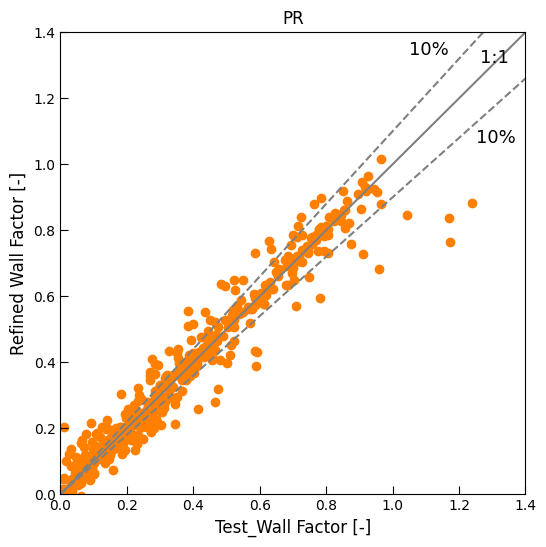

In [14]:
import matplotlib.pyplot as plt


# Set the font to Helvetica (widely available)
plt.rcParams['font.family'] = 'Helvetica'

# Stronger Orange for 20% Deviation Lines
strong_orange = '#FF7F00'  # A brighter, stronger orange

plt.figure(figsize=(6, 6))
plt.plot([0., 1.4], [0., 1.4], 'grey')
plt.plot([0, 1.4], [0*1.1, 1.4*1.1], 'grey', linestyle='dashed')
plt.plot([0, 1.4], [0*0.9, 1.4*0.9], 'grey', linestyle='dashed')

# Annotating "20%" on the deviation lines
plt.text(1.17, 1.2 * 1.1, "10%", color='k', fontsize=13, ha='right', va='bottom')
plt.text(1.37, 1.23 * 0.9, "10%", color='k', fontsize=13, ha='right', va='top')
plt.text(1.35, 1.35, "1:1", color='k', fontsize=13, ha='right', va='top')

# **Set fixed axis limits**
plt.xlim(0, 1.4)  # Fix x-axis range from 0 to 1.5
plt.ylim(0, 1.4)  # Fix y-axis range from 0 to 1.5

# Create scatter plot
plt.scatter(y_test, y_pred, color=strong_orange, marker='o')

# Labels and title
plt.xlabel("Test_Wall Factor [-]", fontsize=12,)
plt.ylabel("Refined Wall Factor [-]", fontsize=12)
plt.title("PR", fontsize=12)

plt.tick_params(axis='both', direction='in', length=6)
# Show plot

plt.show()

## Evaluating the Model Performance

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

R-squared (R²): 0.9442069860831867
Root Mean Squared Error (RMSE): 0.060240253094528115
Mean Squared Error: 0.0036288880928928044
Mean Absolute Error (MAE): 0.038181134526869366


In [16]:
import time

# Measure training time
training_time = end_train - start_train

# Measure prediction time
prediction_time = end_pred - start_pred

print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

Training Time: 1.68676 seconds
Prediction Time: 0.00644 seconds
